In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.manifold import TSNE

In [3]:
pd.options.mode.chained_assignment = None

In [4]:
df = pd.read_csv('SBAnational.csv')
df_copy = df.copy()

In [5]:
df.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711.0,FIFTH THIRD BANK,OH,451120.0,28-Feb-97,1997.0,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526.0,1ST SOURCE BANK,IN,722410.0,28-Feb-97,1997.0,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401.0,GRANT COUNTY STATE BANK,IN,621210.0,28-Feb-97,1997.0,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012.0,1ST NATL BK & TR CO OF BROKEN,OK,0.0,28-Feb-97,1997.0,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801.0,FLORIDA BUS. DEVEL CORP,FL,0.0,28-Feb-97,1997.0,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [6]:
df.isnull().sum()

LoanNr_ChkDgt            0
Name                     4
City                     0
State                    1
Zip                      1
Bank                    12
BankState               12
NAICS                    1
ApprovalDate             1
ApprovalFY               1
Term                     1
NoEmp                    1
NewExist                 1
CreateJob                1
RetainedJob              1
FranchiseCode            1
UrbanRural               1
RevLineCr                3
LowDoc                   1
ChgOffDate           12388
DisbursementDate        26
DisbursementGross        1
BalanceGross             1
MIS_Status              31
ChgOffPrinGr             1
GrAppv                   1
SBA_Appv                 1
dtype: int64

In [7]:
df.dropna(subset=['Name', 'City', 'State', 'BankState', 'NewExist','RevLineCr',
                  'LowDoc', 'DisbursementDate', 'MIS_Status'], inplace=True)
df.isnull().sum()

LoanNr_ChkDgt            0
Name                     0
City                     0
State                    0
Zip                      0
Bank                     0
BankState                0
NAICS                    0
ApprovalDate             0
ApprovalFY               0
Term                     0
NoEmp                    0
NewExist                 0
CreateJob                0
RetainedJob              0
FranchiseCode            0
UrbanRural               0
RevLineCr                0
LowDoc                   0
ChgOffDate           12351
DisbursementDate         0
DisbursementGross        0
BalanceGross             0
MIS_Status               0
ChgOffPrinGr             0
GrAppv                   0
SBA_Appv                 0
dtype: int64

In [8]:
df = df.drop(columns=['ChgOffDate'], axis=1)

In [9]:
c_dollar = ['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']
df[c_dollar] = df[c_dollar].applymap(lambda x: x.strip().replace('$', '').replace(',', ''))
df[c_dollar].head()

,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
0,60000.00,0.00,0.00,60000.00,48000.00
1,40000.00,0.00,0.00,40000.00,32000.00
2,287000.00,0.00,0.00,287000.00,215250.00
3,35000.00,0.00,0.00,35000.00,28000.00
4,229000.00,0.00,0.00,229000.00,229000.00


In [10]:
df.dtypes

LoanNr_ChkDgt          int64
Name                  object
City                  object
State                 object
Zip                  float64
Bank                  object
BankState             object
NAICS                float64
ApprovalDate          object
ApprovalFY           float64
Term                 float64
NoEmp                float64
NewExist             float64
CreateJob            float64
RetainedJob          float64
FranchiseCode        float64
UrbanRural           float64
RevLineCr             object
LowDoc                object
DisbursementDate      object
DisbursementGross     object
BalanceGross          object
MIS_Status            object
ChgOffPrinGr          object
GrAppv                object
SBA_Appv              object
dtype: object

In [11]:
df[c_dollar].astype('float')

,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
0,60000.0,0.0,0.0,60000.0,48000.0
1,40000.0,0.0,0.0,40000.0,32000.0
2,287000.0,0.0,0.0,287000.0,215250.0
3,35000.0,0.0,0.0,35000.0,28000.0
4,229000.0,0.0,0.0,229000.0,229000.0
...,...,...,...,...,...
15563,1088000.0,0.0,0.0,1088000.0,745280.0
15564,323000.0,0.0,0.0,323000.0,242250.0
15565,62410.0,0.0,0.0,59000.0,29500.0
15566,39960.0,0.0,0.0,35000.0,17500.0


In [12]:
df.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711.0,FIFTH THIRD BANK,OH,451120.0,28-Feb-97,1997.0,...,0.0,N,Y,28-Feb-99,60000.00,0.00,P I F,0.00,60000.00,48000.00
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526.0,1ST SOURCE BANK,IN,722410.0,28-Feb-97,1997.0,...,0.0,N,Y,31-May-97,40000.00,0.00,P I F,0.00,40000.00,32000.00
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401.0,GRANT COUNTY STATE BANK,IN,621210.0,28-Feb-97,1997.0,...,0.0,N,N,31-Dec-97,287000.00,0.00,P I F,0.00,287000.00,215250.00
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012.0,1ST NATL BK & TR CO OF BROKEN,OK,0.0,28-Feb-97,1997.0,...,0.0,N,Y,30-Jun-97,35000.00,0.00,P I F,0.00,35000.00,28000.00
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801.0,FLORIDA BUS. DEVEL CORP,FL,0.0,28-Feb-97,1997.0,...,0.0,N,N,14-May-97,229000.00,0.00,P I F,0.00,229000.00,229000.00


In [13]:
df['ApprovalDate'].unique()

array(['28-Feb-97', '2-Jun-80', '7-Feb-06', '11-Jun-80', '4-Oct-96',
       '25-Mar-97', '26-Mar-97', '28-Mar-97', '31-Mar-97', '1-Apr-97',
       '2-Apr-97', '3-Apr-97', '4-Apr-97', '7-Apr-97', '8-Apr-97',
       '10-Apr-97', '11-Apr-97', '14-Apr-97', '15-Apr-97', '21-Apr-97',
       '28-Apr-97', '29-Apr-97', '1-May-97', '3-Mar-97', '2-May-97',
       '5-May-97', '6-May-97', '9-May-97', '14-May-97', '16-May-97',
       '19-May-97', '20-May-97', '21-May-97', '22-May-97', '23-May-97',
       '29-May-97', '5-Jun-97', '9-Jun-97', '12-Jun-97', '13-Jun-97',
       '16-Jun-97', '18-Jun-80', '17-Jun-97', '18-Jun-97', '19-Jun-97',
       '20-Jun-97', '23-Jun-97', '27-Jun-97', '2-Jul-97', '8-Jul-97',
       '9-Jul-97', '10-Jul-97', '16-Jul-97', '21-Jul-97', '24-Jul-97',
       '25-Jul-97', '26-Aug-97', '27-Aug-97', '28-Aug-97', '29-Aug-97',
       '19-Sep-97', '24-Sep-97', '26-Sep-97', '29-Sep-97', '9-Oct-97',
       '10-Oct-97', '14-Oct-97', '29-Oct-97', '3-Nov-97', '17-Nov-97',
       '19-Jun

In [14]:
df['ApprovalDate'] = df['ApprovalDate'].astype(str)
df['ApprovalDate'] = pd.to_datetime(df['ApprovalDate'])

In [15]:
df.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711.0,FIFTH THIRD BANK,OH,451120.0,1997-02-28,1997.0,...,0.0,N,Y,28-Feb-99,60000.00,0.00,P I F,0.00,60000.00,48000.00
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526.0,1ST SOURCE BANK,IN,722410.0,1997-02-28,1997.0,...,0.0,N,Y,31-May-97,40000.00,0.00,P I F,0.00,40000.00,32000.00
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401.0,GRANT COUNTY STATE BANK,IN,621210.0,1997-02-28,1997.0,...,0.0,N,N,31-Dec-97,287000.00,0.00,P I F,0.00,287000.00,215250.00
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012.0,1ST NATL BK & TR CO OF BROKEN,OK,0.0,1997-02-28,1997.0,...,0.0,N,Y,30-Jun-97,35000.00,0.00,P I F,0.00,35000.00,28000.00
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801.0,FLORIDA BUS. DEVEL CORP,FL,0.0,1997-02-28,1997.0,...,0.0,N,N,14-May-97,229000.00,0.00,P I F,0.00,229000.00,229000.00


In [16]:
df.ApprovalFY.unique()

array([1997., 1980., 2006., 1998., 1999., 2000., 2001., 1972., 2003.,
       2004., 1978., 1979., 1981., 2005.])

In [17]:
df.loc[df['ApprovalFY'] == '1976A', 'ApprovalFY'] = '1976'

In [18]:
df['ApprovalFY'] = df['ApprovalFY'].astype(int)

In [19]:
df.dtypes

LoanNr_ChkDgt                 int64
Name                         object
City                         object
State                        object
Zip                         float64
Bank                         object
BankState                    object
NAICS                       float64
ApprovalDate         datetime64[ns]
ApprovalFY                    int64
Term                        float64
NoEmp                       float64
NewExist                    float64
CreateJob                   float64
RetainedJob                 float64
FranchiseCode               float64
UrbanRural                  float64
RevLineCr                    object
LowDoc                       object
DisbursementDate             object
DisbursementGross            object
BalanceGross                 object
MIS_Status                   object
ChgOffPrinGr                 object
GrAppv                       object
SBA_Appv                     object
dtype: object

In [20]:
df.drop(columns=['LoanNr_ChkDgt', 'Name', 'City', 'Zip',
                 'SBA_Appv', 'Bank', 'BankState', 'DisbursementGross', 
                 'BalanceGross','ChgOffPrinGr'], axis=1, inplace=True)

In [21]:
df.head()

,State,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,MIS_Status,GrAppv
0,IN,451120.0,1997-02-28,1997,84.0,4.0,2.0,0.0,0.0,1.0,0.0,N,Y,28-Feb-99,P I F,60000.00
1,IN,722410.0,1997-02-28,1997,60.0,2.0,2.0,0.0,0.0,1.0,0.0,N,Y,31-May-97,P I F,40000.00
2,IN,621210.0,1997-02-28,1997,180.0,7.0,1.0,0.0,0.0,1.0,0.0,N,N,31-Dec-97,P I F,287000.00
3,OK,0.0,1997-02-28,1997,60.0,2.0,1.0,0.0,0.0,1.0,0.0,N,Y,30-Jun-97,P I F,35000.00
4,FL,0.0,1997-02-28,1997,240.0,14.0,1.0,7.0,7.0,1.0,0.0,N,N,14-May-97,P I F,229000.00


In [22]:
df['NewExist'].unique()

array([2., 1., 0.])

In [23]:
df = df[~(df['NewExist'] == 0)]

In [24]:
df['IsNewBusiness'] = np.where(df['NewExist'] == 2, 1, 0)
df.drop(columns=['NewExist'], axis=1, inplace=True)

In [25]:
df.head()

,State,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,MIS_Status,GrAppv,IsNewBusiness
0,IN,451120.0,1997-02-28,1997,84.0,4.0,0.0,0.0,1.0,0.0,N,Y,28-Feb-99,P I F,60000.00,1
1,IN,722410.0,1997-02-28,1997,60.0,2.0,0.0,0.0,1.0,0.0,N,Y,31-May-97,P I F,40000.00,1
2,IN,621210.0,1997-02-28,1997,180.0,7.0,0.0,0.0,1.0,0.0,N,N,31-Dec-97,P I F,287000.00,0
3,OK,0.0,1997-02-28,1997,60.0,2.0,0.0,0.0,1.0,0.0,N,Y,30-Jun-97,P I F,35000.00,0
4,FL,0.0,1997-02-28,1997,240.0,14.0,7.0,7.0,1.0,0.0,N,N,14-May-97,P I F,229000.00,0


In [26]:
df.MIS_Status = np.where(df.MIS_Status == 'P I F', 1, 0)

In [27]:
df.head()

,State,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,MIS_Status,GrAppv,IsNewBusiness
0,IN,451120.0,1997-02-28,1997,84.0,4.0,0.0,0.0,1.0,0.0,N,Y,28-Feb-99,1,60000.00,1
1,IN,722410.0,1997-02-28,1997,60.0,2.0,0.0,0.0,1.0,0.0,N,Y,31-May-97,1,40000.00,1
2,IN,621210.0,1997-02-28,1997,180.0,7.0,0.0,0.0,1.0,0.0,N,N,31-Dec-97,1,287000.00,0
3,OK,0.0,1997-02-28,1997,60.0,2.0,0.0,0.0,1.0,0.0,N,Y,30-Jun-97,1,35000.00,0
4,FL,0.0,1997-02-28,1997,240.0,14.0,7.0,7.0,1.0,0.0,N,N,14-May-97,1,229000.00,0


In [28]:
df['UrbanRural'].unique()

array([0., 1., 2.])

In [29]:
df['UrbanRural'] = df['UrbanRural'].astype(int)

In [30]:
for x in df['UrbanRural'].unique():
    print(x, sum(df['UrbanRural'] == x))

0 5158
1 8032
2 2286


In [31]:
df['RevLineCr'].unique()

array(['N', '0', 'Y', 'T', '`', ','], dtype=object)

In [32]:
df['LowDoc'].unique()

array(['Y', 'N', 'C'], dtype=object)

In [33]:
df = df[(df['RevLineCr'] == 'Y') | (df['RevLineCr'] == 'N')] 
df = df[(df['LowDoc'] == 'Y') | (df['LowDoc'] == 'N')]

df['RevLineCr'] = np.where(df['RevLineCr'] == 'Y', 1, 0)
df['LowDoc'] = np.where(df['LowDoc'] == 'Y', 1, 0)

In [34]:
df['ApprovalDate'].dtype

dtype('<M8[ns]')

In [35]:
df['DisbursementDate'].dtype

dtype('O')

In [36]:
df['DisbursementDate'] = pd.to_datetime(df['DisbursementDate'])
df['DisbursementTime'] = df['DisbursementDate'] - df['ApprovalDate']
df['DisbursementTime'] = df['DisbursementTime'].astype(str)
df['DisbursementTime'] = df['DisbursementTime'].str.replace(' days', '')

In [37]:
df['DisbursementTime'].unique()

array(['730', '92', '306', '122', '75', '50', '487', '153', '61', '360',
       '275', '52', '292', '214', '457', '184', '396', '82', '21', '320',
       '113', '245', '14', '31', '220', '5', '411', '103', '439', '89',
       '1918', '201', '55', '348', '143', '71', '74', '125', '19', '257',
       '104', '163', '883', '58', '11', '852', '503', '761', '35', '1131',
       '96', '33', '794', '1095', '486', '696', '87', '18', '110', '77',
       '15', '742', '130', '99', '37', '1375', '305', '63', '62', '29',
       '24', '106', '20', '13', '85', '493', '399', '430', '34', '454',
       '46', '1627', '746', '255', '1231', '9', '36', '216', '26', '205',
       '263', '45', '196', '179', '118', '171', '100', '1389', '264',
       '48', '27', '1295', '242', '38', '182', '415', '16', '107', '78',
       '-44', '408', '10', '284', '188', '1124', '557', '175', '17',
       '169', '25', '57', '119', '23', '211', '30', '1762', '150', '121',
       '59', '44', '133', '70', '67', '28', '318', '80'

In [38]:
df['DisbursementTime'] = df['DisbursementTime'].astype(int)

In [39]:
df['DisbursementTime'].describe()

count    12509.000000
mean       113.399233
std        197.913139
min       -274.000000
25%         28.000000
50%         49.000000
75%        102.000000
max       2245.000000
Name: DisbursementTime, dtype: float64

In [40]:
sum(df['DisbursementTime'] < 0)

6

In [41]:
df = df[~(df['DisbursementTime'] < 0)]

In [42]:
df.head()

,State,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,MIS_Status,GrAppv,IsNewBusiness,DisbursementTime
0,IN,451120.0,1997-02-28,1997,84.0,4.0,0.0,0.0,1.0,0,0,1,1999-02-28,1,60000.00,1,730
1,IN,722410.0,1997-02-28,1997,60.0,2.0,0.0,0.0,1.0,0,0,1,1997-05-31,1,40000.00,1,92
2,IN,621210.0,1997-02-28,1997,180.0,7.0,0.0,0.0,1.0,0,0,0,1997-12-31,1,287000.00,0,306
3,OK,0.0,1997-02-28,1997,60.0,2.0,0.0,0.0,1.0,0,0,1,1997-06-30,1,35000.00,0,122
4,FL,0.0,1997-02-28,1997,240.0,14.0,7.0,7.0,1.0,0,0,0,1997-05-14,1,229000.00,0,75


In [43]:
df.drop(columns=['State', 'ApprovalDate', 'DisbursementDate'], inplace=True, axis=1)

In [44]:
df['FranchiseCode'].describe()

count    12503.000000
mean      1758.919059
std      10326.966232
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max      91283.000000
Name: FranchiseCode, dtype: float64

In [45]:
df.loc[(df['FranchiseCode'] <= 1), 'IsFranchise'] = 0
df.loc[(df['FranchiseCode'] > 1), 'IsFranchise'] = 1

df['IsFranchise'] = df['IsFranchise'].astype(int)
df.drop(columns=['FranchiseCode'], axis=1, inplace=True)

In [46]:
df['NAICS'].unique()

array([451120., 722410., 621210.,      0., 332721., 811118., 721310.,
       811111., 235950., 445299., 421330., 624410., 722211., 451110.,
       611110., 445310., 238140., 532490., 454210., 541611., 332996.,
       235930., 621310., 448130., 512110., 314999., 444220., 423710.,
       524128., 323117., 561612., 451220., 722110., 421310., 722310.,
       713940., 541310., 331513., 541921., 541810., 561440., 453991.,
       541613., 311320., 448140., 541110., 484121., 561450., 331521.,
       112210., 541820., 624310., 421810., 541511., 722320., 811112.,
       713950., 333314., 448120., 235410., 233320., 454311., 541512.,
       541213., 561730., 621111., 444130., 333131., 541940., 235210.,
       531390., 541350., 811121., 445110., 541519., 337110., 339999.,
       446110., 336991., 522310., 484110., 488999., 448310., 518210.,
       453220., 327390., 541710., 311811., 452990., 812310., 453998.,
       541330., 321920., 453110., 451130., 421910., 333518., 511110.,
       235110., 5112

In [47]:
df.drop(columns=['NAICS'], inplace=True)

In [48]:
df.dtypes


ApprovalFY            int64
Term                float64
NoEmp               float64
CreateJob           float64
RetainedJob         float64
UrbanRural            int64
RevLineCr             int64
LowDoc                int64
MIS_Status            int64
GrAppv               object
IsNewBusiness         int64
DisbursementTime      int64
IsFranchise           int64
dtype: object

In [49]:
df['GrAppv'] = df['GrAppv'].astype(float)

In [50]:
df.head()

,ApprovalFY,Term,NoEmp,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,MIS_Status,GrAppv,IsNewBusiness,DisbursementTime,IsFranchise
0,1997,84.0,4.0,0.0,0.0,0,0,1,1,60000.0,1,730,0
1,1997,60.0,2.0,0.0,0.0,0,0,1,1,40000.0,1,92,0
2,1997,180.0,7.0,0.0,0.0,0,0,0,1,287000.0,0,306,0
3,1997,60.0,2.0,0.0,0.0,0,0,1,1,35000.0,0,122,0
4,1997,240.0,14.0,7.0,7.0,0,0,0,1,229000.0,0,75,0


In [51]:
df.UrbanRural.unique()

array([0, 1, 2])

In [52]:
df.UrbanRural.dtypes

dtype('int64')

In [53]:
df['RevLineCr'].unique()

array([0, 1])

In [54]:
df = pd.get_dummies(df, columns=['UrbanRural'])
df.head()

,ApprovalFY,Term,NoEmp,CreateJob,RetainedJob,RevLineCr,LowDoc,MIS_Status,GrAppv,IsNewBusiness,DisbursementTime,IsFranchise,UrbanRural_0,UrbanRural_1,UrbanRural_2
0,1997,84.0,4.0,0.0,0.0,0,1,1,60000.0,1,730,0,1,0,0
1,1997,60.0,2.0,0.0,0.0,0,1,1,40000.0,1,92,0,1,0,0
2,1997,180.0,7.0,0.0,0.0,0,0,1,287000.0,0,306,0,1,0,0
3,1997,60.0,2.0,0.0,0.0,0,1,1,35000.0,0,122,0,1,0,0
4,1997,240.0,14.0,7.0,7.0,0,0,1,229000.0,0,75,0,1,0,0


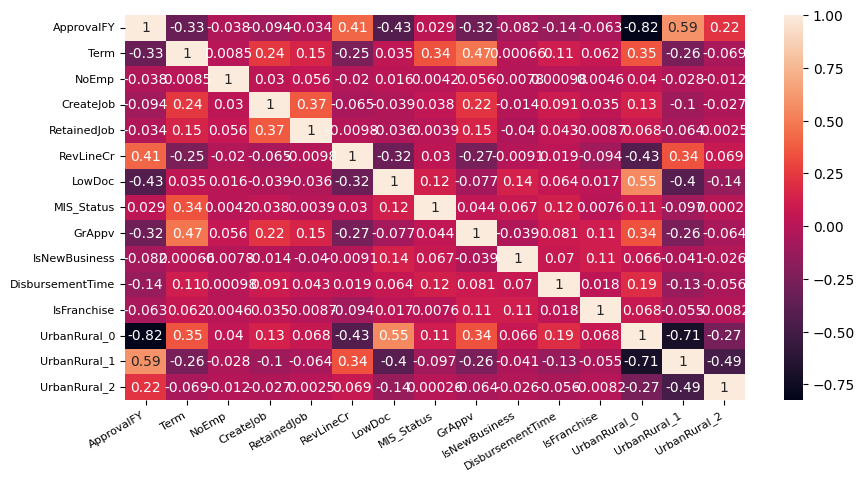

In [55]:
cor_fig, cor_ax = plt.subplots(figsize=(10, 5))
corr_matrix = df.corr()
cor_ax = sns.heatmap(corr_matrix, annot=True)
plt.xticks(rotation=30, horizontalalignment='right', fontsize=8)
plt.yticks(fontsize=8)

plt.show()

In [56]:
df.drop(labels='UrbanRural_2', axis=1, inplace=True)

In [57]:
df.head()

,ApprovalFY,Term,NoEmp,CreateJob,RetainedJob,RevLineCr,LowDoc,MIS_Status,GrAppv,IsNewBusiness,DisbursementTime,IsFranchise,UrbanRural_0,UrbanRural_1
0,1997,84.0,4.0,0.0,0.0,0,1,1,60000.0,1,730,0,1,0
1,1997,60.0,2.0,0.0,0.0,0,1,1,40000.0,1,92,0,1,0
2,1997,180.0,7.0,0.0,0.0,0,0,1,287000.0,0,306,0,1,0
3,1997,60.0,2.0,0.0,0.0,0,1,1,35000.0,0,122,0,1,0
4,1997,240.0,14.0,7.0,7.0,0,0,1,229000.0,0,75,0,1,0


In [58]:
X = df.drop(columns='MIS_Status', axis=1)
y = df['MIS_Status']

scale = StandardScaler()
X_s = scale.fit_transform(X)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_s, y, test_size=0.3)

In [60]:
print(X_train.shape, X_test.shape)

(8752, 13) (3751, 13)


In [96]:
lr = LogisticRegression(penalty='none', 
                        max_iter=10000,
                        random_state=123)

lr.fit(X_train, y_train)
y_lr_pred = lr.predict(X_test)

print(classification_report(y_test, y_lr_pred))

              precision    recall  f1-score   support

           0       0.70      0.50      0.58       672
           1       0.90      0.95      0.92      3079

    accuracy                           0.87      3751
   macro avg       0.80      0.73      0.75      3751
weighted avg       0.86      0.87      0.86      3751



/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


In [62]:
lr2 = LogisticRegression(penalty='l2', 
                        max_iter=10000,
                        random_state=123)

lr2.fit(X_train, y_train)
y_lr2_pred = lr2.predict(X_test)

print(classification_report(y_test, y_lr2_pred))

              precision    recall  f1-score   support

           0       0.70      0.50      0.58       672
           1       0.90      0.95      0.92      3079

    accuracy                           0.87      3751
   macro avg       0.80      0.73      0.75      3751
weighted avg       0.86      0.87      0.86      3751



In [63]:
X_train.shape

(8752, 13)

In [64]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

X_test_pca.shape

(3751, 2)

In [65]:
X_test_pca[:,0]

array([ 5.76264367, -1.53500231, -1.65863665, ..., -1.96329929,
        3.58170717, -1.45457604])

In [66]:
y_test

11921    1
8479     1
11511    1
12051    1
3621     0
        ..
3732     1
12754    0
9128     0
4823     1
5366     1
Name: MIS_Status, Length: 3751, dtype: int64

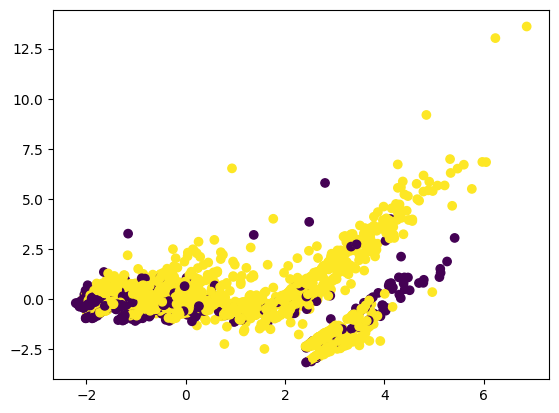

In [67]:
plt.scatter(X_test_pca[:,0], X_test_pca[:,1], c=y_test)

In [68]:
pca_2d_points_train = list(zip(X_train_pca[:,0], X_train_pca[:,1]))
pca_2d_points_test = list(zip(X_test_pca[:,0], X_test_pca[:,1]))

In [69]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(pca_2d_points_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [70]:
knn.score(pca_2d_points_test, y_test)

0.7613969608104505

In [71]:
knn2_pca = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 15)}
knn2_pca_gscv = GridSearchCV(knn2_pca, param_grid, cv=10)
knn2_pca_gscv.fit(pca_2d_points_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [72]:
knn2_pca_best_n = [*knn2_pca_gscv.best_params_.values()][0]
knn2_pca_best_n

14

In [73]:
knn_pca_best = KNeighborsClassifier(n_neighbors=knn2_pca_best_n)
knn_pca_best.fit(pca_2d_points_train, y_train)
knn_pca_best.score(pca_2d_points_test, y_test)

0.7792588643028526

In [74]:
knn2 = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 15)}
knn2_gscv = GridSearchCV(knn2, param_grid, cv=10)
knn2_gscv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [75]:
knn2_best_n = [*knn2_gscv.best_params_.values()][0]
knn2_best_n

5

In [94]:
knn_best = KNeighborsClassifier(n_neighbors=knn2_best_n)

knn_best.fit(X_train, y_train)

KNeighborsClassifier()

In [77]:
knn_best.score(X_test, y_test)

0.9165555851772861

In [97]:
lr_pca = LogisticRegression(penalty='none',
                            max_iter=10000,
                            random_state=123)

lr_pca.fit(X_train_pca, y_train)
y_pca_pred = lr_pca.predict(X_test_pca)

print(classification_report(y_test, y_pca_pred, labels=np.unique(y_pca_pred)))

              precision    recall  f1-score   support

           1       0.82      1.00      0.90      3079

   micro avg       0.82      1.00      0.90      3079
   macro avg       0.82      1.00      0.90      3079
weighted avg       0.82      1.00      0.90      3079



/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


In [79]:
tsne = TSNE(n_components=2)
X_train_tsne = tsne.fit_transform(X_train)
X_test_tsne = tsne.fit_transform(X_test)

In [98]:
lr_tsne = LogisticRegression(penalty='none',
                            max_iter=10000,
                            random_state=123)
lr_tsne.fit(X_train_tsne, y_train)
y_tsne_pred = lr_tsne.predict(X_test_tsne)

print(classification_report(y_test, y_tsne_pred, labels=np.unique(y_tsne_pred)))

              precision    recall  f1-score   support

           1       0.82      1.00      0.90      3079

   micro avg       0.82      1.00      0.90      3079
   macro avg       0.82      1.00      0.90      3079
weighted avg       0.82      1.00      0.90      3079



/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


In [90]:
imp = lr.coef_[0]

for i,v in enumerate(imp):
    print(f'{df.columns[i]:17}: {v:.2f}')

ApprovalFY       : 1.58
Term             : 2.65
NoEmp            : 0.21
CreateJob        : 0.08
RetainedJob      : -0.16
RevLineCr        : 0.26
LowDoc           : 0.36
MIS_Status       : -0.04
GrAppv           : 0.20
IsNewBusiness    : 0.47
DisbursementTime : -0.10
IsFranchise      : 1.27
UrbanRural_0     : -0.16


In [82]:
xgb = XGBClassifier(random_state=123)

xgb.fit(X_train, y_train)
y_xgb_pred = xgb.predict(X_test)

print(classification_report(y_test, y_xgb_pred, digits=3))

              precision    recall  f1-score   support

           0      0.857     0.872     0.864       672
           1      0.972     0.968     0.970      3079

    accuracy                          0.951      3751
   macro avg      0.914     0.920     0.917      3751
weighted avg      0.951     0.951     0.951      3751



In [83]:
for col, imp in sorted(zip(df.drop(columns='MIS_Status', index=1).columns,
                            xgb.feature_importances_), 
                            key=lambda x: x[1], reverse=True):
    
    print(f'{col:16} : {imp:.2f}')

Term             : 0.27
ApprovalFY       : 0.22
UrbanRural_0     : 0.12
LowDoc           : 0.06
IsNewBusiness    : 0.05
RevLineCr        : 0.05
IsFranchise      : 0.05
GrAppv           : 0.04
UrbanRural_1     : 0.03
DisbursementTime : 0.03
RetainedJob      : 0.03
NoEmp            : 0.02
CreateJob        : 0.02


In [84]:
for col, imp in zip(df.drop(columns='MIS_Status', index=1).columns,
                            xgb.feature_importances_):
    
    print(f'{col:16} : {imp:.2f}')

ApprovalFY       : 0.22
Term             : 0.27
NoEmp            : 0.02
CreateJob        : 0.02
RetainedJob      : 0.03
RevLineCr        : 0.05
LowDoc           : 0.06
GrAppv           : 0.04
IsNewBusiness    : 0.05
DisbursementTime : 0.03
IsFranchise      : 0.05
UrbanRural_0     : 0.12
UrbanRural_1     : 0.03


In [85]:
X_train2 = np.delete(X_train, [2,10,11], 1)
X_test2 = np.delete(X_test, [2,10,11], 1)

In [86]:
xgb2 = XGBClassifier(random_state=123)

xgb2.fit(X_train2, y_train)
y_xgb2_pred = xgb2.predict(X_test2)

print(classification_report(y_test, y_xgb2_pred, digits=3))

              precision    recall  f1-score   support

           0      0.858     0.875     0.867       672
           1      0.973     0.968     0.971      3079

    accuracy                          0.952      3751
   macro avg      0.915     0.922     0.919      3751
weighted avg      0.952     0.952     0.952      3751



In [87]:
print(confusion_matrix(y_test, y_xgb2_pred))

[[ 588   84]
 [  97 2982]]


In [99]:
m_svm = svm.LinearSVC(dual=False)
m_svm.fit(X_train2, y_train)
y_svm_pred = m_svm.predict(X_test2)

print(classification_report(y_svm_pred, y_test, digits=3))

              precision    recall  f1-score   support

           0      0.415     0.728     0.529       383
           1      0.966     0.883     0.923      3368

    accuracy                          0.868      3751
   macro avg      0.691     0.806     0.726      3751
weighted avg      0.910     0.868     0.883      3751

